In [1]:
from keras.models import Model
import keras.models
import keras.layers as layers
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from keras import backend as K
from keras_contrib.layers.normalization import InstanceNormalization

import argparse
import capsulenet as cnet
import cnn_analyzer as cnna
import cnn_builder as cbuild
import config
import csv
import niftiutils.helper_fxns as hf
import importlib
import matplotlib.pyplot as plt
import numpy as np
import operator
import os
import pandas as pd
import random
%matplotlib inline

Using TensorFlow backend.


In [13]:
importlib.reload(cnet)
importlib.reload(config)
importlib.reload(hf)
importlib.reload(cbuild)
C = config.Config()
T = config.Hyperparams()
T.get_best_hyperparams()

In [14]:
train_generator, (x_test, y_test), _ = cbuild.load_data_capsnet()
(x_train, y_train), _ = next(train_generator)

In [15]:
parser = argparse.ArgumentParser()
parser.add_argument('strings', metavar='STRING', nargs='*', help='String for searching')
parser.add_argument('--epochs', default=25, type=int)
parser.add_argument('--batch_size', default=2, type=int)
parser.add_argument('--lr', default=0.001, type=float,
                    help="Initial learning rate")
parser.add_argument('--lr_decay', default=0.9, type=float,
                    help="The value multiplied by lr at each epoch. Set a larger value for larger epochs")
parser.add_argument('--lam_recon', default=0.392, type=float,
                    help="The coefficient for the loss of decoder")
parser.add_argument('-r', '--routings', default=3, type=int,
                    help="Number of iterations used in routing algorithm. should > 0")
#parser.add_argument('--shift_fraction', default=0.1, type=float,
#                    help="Fraction of pixels to shift at most in each direction.")
parser.add_argument('--debug', action='store_true',
                    help="Save weights by TensorBoard")
parser.add_argument('--save_dir', default='./result')
parser.add_argument('-t', '--testing', action='store_true',
                    help="Test the trained model on testing dataset")
parser.add_argument('--digit', default=5, type=int,
                    help="Digit to manipulate")
parser.add_argument('-w', '--weights', default=None,
                    help="The path of the saved weights. Should be specified when testing")
args = parser.parse_args('--epochs 25')# --lr 0.002 --lr_decay 0.87')

In [16]:
importlib.reload(cnet)

model, eval_model, manipulate_model = cnet.CapsNet(input_shape=x_train.shape[1:],
                                              n_class=len(np.unique(np.argmax(y_train, 1))),
                                              routings=args.routings)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 24, 24, 12, 3 0                                            
__________________________________________________________________________________________________
conv1 (Conv3D)                  (None, 17, 17, 5, 25 393472      input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 17, 17, 5, 25 1024        conv1[0][0]                      
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 17, 17, 5, 25 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
primarycap

Epoch 1/50
 999/1000 [============================>.] - ETA: 0s - loss: 1.7538 - capsnet_loss: 1.6852 - decoder_loss: 0.1750 - capsnet_acc: 0.1607
Epoch 00001: val_capsnet_acc improved from -inf to 0.20000, saving model to ./result/weights-01.h5
1000/1000 [==============================] - 156s 156ms/step - loss: 1.7537 - capsnet_loss: 1.6852 - decoder_loss: 0.1749 - capsnet_acc: 0.1610 - val_loss: 1.7218 - val_capsnet_loss: 1.6575 - val_decoder_loss: 0.1640 - val_capsnet_acc: 0.2000
Epoch 2/50
 999/1000 [============================>.] - ETA: 0s - loss: 1.6616 - capsnet_loss: 1.6039 - decoder_loss: 0.1473 - capsnet_acc: 0.2207
Epoch 00002: val_capsnet_acc improved from 0.20000 to 0.28333, saving model to ./result/weights-02.h5
1000/1000 [==============================] - 90s 90ms/step - loss: 1.6617 - capsnet_loss: 1.6039 - decoder_loss: 0.1473 - capsnet_acc: 0.2207 - val_loss: 1.6793 - val_capsnet_loss: 1.6143 - val_decoder_loss: 0.1657 - val_capsnet_acc: 0.2833
Epoch 3/50
 999/1000 

Epoch 19/50
 999/1000 [============================>.] - ETA: 0s - loss: 0.5500 - capsnet_loss: 0.4906 - decoder_loss: 0.1514 - capsnet_acc: 0.8340
Epoch 00019: val_capsnet_acc did not improve
1000/1000 [==============================] - 83s 83ms/step - loss: 0.5499 - capsnet_loss: 0.4906 - decoder_loss: 0.1514 - capsnet_acc: 0.8340 - val_loss: 0.7775 - val_capsnet_loss: 0.7131 - val_decoder_loss: 0.1641 - val_capsnet_acc: 0.7333
Epoch 20/50
 999/1000 [============================>.] - ETA: 0s - loss: 0.5096 - capsnet_loss: 0.4496 - decoder_loss: 0.1531 - capsnet_acc: 0.8510
Epoch 00020: val_capsnet_acc did not improve
1000/1000 [==============================] - 83s 83ms/step - loss: 0.5094 - capsnet_loss: 0.4494 - decoder_loss: 0.1531 - capsnet_acc: 0.8512 - val_loss: 0.6543 - val_capsnet_loss: 0.5900 - val_decoder_loss: 0.1641 - val_capsnet_acc: 0.7667
Epoch 21/50
 999/1000 [============================>.] - ETA: 0s - loss: 0.4994 - capsnet_loss: 0.4410 - decoder_loss: 0.1488 - caps

Epoch 38/50
 999/1000 [============================>.] - ETA: 0s - loss: 0.3932 - capsnet_loss: 0.3339 - decoder_loss: 0.1513 - capsnet_acc: 0.8906
Epoch 00038: val_capsnet_acc did not improve
1000/1000 [==============================] - 83s 83ms/step - loss: 0.3930 - capsnet_loss: 0.3337 - decoder_loss: 0.1514 - capsnet_acc: 0.8907 - val_loss: 0.6813 - val_capsnet_loss: 0.6170 - val_decoder_loss: 0.1641 - val_capsnet_acc: 0.7667
Epoch 39/50
 999/1000 [============================>.] - ETA: 0s - loss: 0.3651 - capsnet_loss: 0.3057 - decoder_loss: 0.1515 - capsnet_acc: 0.9051
Epoch 00039: val_capsnet_acc did not improve
1000/1000 [==============================] - 82s 82ms/step - loss: 0.3649 - capsnet_loss: 0.3056 - decoder_loss: 0.1515 - capsnet_acc: 0.9052 - val_loss: 0.6832 - val_capsnet_loss: 0.6189 - val_decoder_loss: 0.1640 - val_capsnet_acc: 0.7667
Epoch 40/50
 999/1000 [============================>.] - ETA: 0s - loss: 0.3756 - capsnet_loss: 0.3156 - decoder_loss: 0.1532 - caps

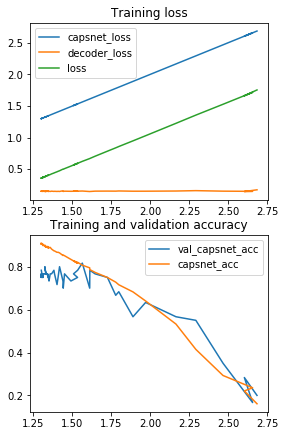

In [17]:
cnet.train(model=model, data=(train_generator, (x_test, y_test)), args=args)

In [42]:
model.save('E:\\trained_model2.h5')

In [43]:
train_generator, (x_test, y_test), Z_test = data

In [44]:
(x_train, y_train), _ = next(train_generator)

In [12]:
model = keras.models.load_model('E:\\trained_model2.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_51 (InputLayer)        (None, 24, 24, 12, 3)     0         
_________________________________________________________________
instance_normalization_3 (In (None, 24, 24, 12, 3)     6         
_________________________________________________________________
flatten_10 (Flatten)         (None, 20736)             0         
_________________________________________________________________
dense_34 (Dense)             (None, 128)               2654336   
_________________________________________________________________
reshape_18 (Reshape)         (None, 128, 1, 1, 1, 1)   0         
_________________________________________________________________
time_distributed_23 (TimeDis (None, 128, 11, 11, 6, 64 46528     
_________________________________________________________________
time_distributed_24 (TimeDis (None, 128, 24, 24, 12, 6 131136    
Total para

C:\Users\Clinton\AppData\Local\conda\conda\envs\old-keras\lib\site-packages\keras\models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [60]:
model = keras.models.load_model('E:\\trained_model2.h5')
eval_model.load_weights('result2\\weights-35.h5')
manipulate_model.load_weights('result2\\weights-35.h5')

C:\Users\Clinton\AppData\Local\conda\conda\envs\old-keras\lib\site-packages\keras\models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [51]:
model.load_weights('./result/weights-35.h5')

In [ ]:
C.classes_to_include

In [63]:
importlib.reload(cnet)
for i in range(6):
    cnet.manipulate_latent(manipulate_model, (x_test, y_test), args, i)

------------------------------Begin: manipulate------------------------------
manipulated result saved to ./result/manipulate-hcc.png
------------------------------End: manipulate------------------------------
------------------------------Begin: manipulate------------------------------
manipulated result saved to ./result/manipulate-cholangio.png
------------------------------End: manipulate------------------------------
------------------------------Begin: manipulate------------------------------
manipulated result saved to ./result/manipulate-colorectal.png
------------------------------End: manipulate------------------------------
------------------------------Begin: manipulate------------------------------
manipulated result saved to ./result/manipulate-cyst.png
------------------------------End: manipulate------------------------------
------------------------------Begin: manipulate------------------------------
manipulated result saved to ./result/manipulate-hemangioma.png
-----

In [ ]:
importlib.reload(cnet)
cnet.test(model=eval_model, data=(x_test, y_test), args=args)

In [ ]:
a = layers.Input([28,28,1])
x = layers.Conv2D(4,kernel_size=9,strides=1)(a)
x = layers.Conv2D(4,kernel_size=9,strides=2)(x)
b = x
model = Model(a,b)
model.summary(150)

In [40]:
a = layers.Input(shape=[24,24,12,3])
x = InstanceNormalization(axis=4)(a)
x = layers.Flatten()(x)
x = layers.Dense(128)(x)
x = layers.Reshape(target_shape=(128,1,1,1,1))(x)
x = layers.TimeDistributed(layers.Conv3DTranspose(filters=64, kernel_size=[11,11,6], strides=1, padding='valid', activation='relu'))(x)
x = layers.TimeDistributed(layers.Conv3DTranspose(filters=64, kernel_size=[4,4,2], strides=2, padding='valid', activation='relu'))(x)
#x = layers.Reshape((3, 24, 24, 12))(x)
#x = layers.Permute((2,3,4,1))(x)
b = x
model = Model(a,b)

model.summary(100)

____________________________________________________________________________________________________
Layer (type)                                 Output Shape                            Param #        
input_51 (InputLayer)                        (None, 24, 24, 12, 3)                   0              
____________________________________________________________________________________________________
instance_normalization_3 (InstanceNormalizat (None, 24, 24, 12, 3)                   6              
____________________________________________________________________________________________________
flatten_10 (Flatten)                         (None, 20736)                           0              
____________________________________________________________________________________________________
dense_34 (Dense)                             (None, 128)                             2654336        
___________________________________________________________________________________________

C_list = [config.Config(), config.Config()]
C_list[0].dims = [36,36,12]
C_list[1].dims = [24,24,12]
C_list[0].artif_dir = "E:\\imgs\\artif_imgs_3612\\"
C_list[1].artif_dir = "E:\\imgs\\artif_imgs_2412\\"
C_list[0].aug_dir = "E:\\imgs\\aug_imgs_3612_cropint\\"
C_list[1].aug_dir = "E:\\imgs\\aug_imgs_2412_cropint\\"
C_list[0].orig_dir = "E:\\imgs\\orig_imgs_3612_cropint\\"
C_list[1].orig_dir = "E:\\imgs\\orig_imgs_2412_cropint\\"

In [68]:
Z_reader = ['E103312835_1','12823036_0','12569915_0','E102093118_0','E102782525_0','12799652_0','E100894274_0','12874178_3','E100314676_0','12842070_0','13092836_2','12239783_0','12783467_0','13092966_0','E100962970_0','E100183257_1','E102634440_0','E106182827_0','12582632_0','E100121654_0','E100407633_0','E105310461_0','12788616_0','E101225606_0','12678910_1','E101083458_1','12324408_0','13031955_0','E101415263_0','E103192914_0','12888679_2','E106096969_0','E100192709_1','13112385_1','E100718398_0','12207268_0','E105244287_0','E102095465_0','E102613189_0','12961059_0','11907521_0','E105311123_0','12552705_0','E100610622_0','12975280_0','E105918926_0','E103020139_1','E101069048_1','E105427046_0','13028374_0','E100262351_0','12302576_0','12451831_0','E102929168_0','E100383453_0','E105344747_0','12569826_0','E100168661_0','12530153_0','E104697262_0']

In [96]:
importlib.reload(cnet)
importlib.reload(config)
importlib.reload(hf)
importlib.reload(cbuild)
C = config.Config()
T = config.Hyperparams()
#T.steps_per_epoch = 50
#T.epochs= 1
#T.get_best_hyperparams()

In [ ]:
cbuild.run_fixed_hyperparams([C], hyperparams=T)#C_list)

orig_data_dict, num_samples = cbuild._collect_unaug_data()

In [97]:
model = cbuild.build_cnn_hyperparams(T)
model.summary(line_length=150)

______________________________________________________________________________________________________________________________________________________
Layer (type)                                                       Output Shape                                                Param #                
input_94 (InputLayer)                                              (None, 24, 24, 12, 3)                                       0                      
______________________________________________________________________________________________________________________________________________________
reshape_36 (Reshape)                                               (None, 24, 24, 12, 3, 1)                                    0                      
______________________________________________________________________________________________________________________________________________________
batch_normalization_110 (BatchNormalization)                       (None, 24, 24, 12, 3, 1)   

In [94]:
X_test, Y_test, train_generator, num_samples, train_orig, Z = cbuild.get_cnn_data(n=4, n_art=0)#, Z_test_fixed=Z_reader)
Z_test, Z_train_orig = Z
X_train_orig, Y_train_orig = train_orig

In [59]:
#from keras.utils import multi_gpu_model
#model = multi_gpu_model(model, gpus=2)

In [ ]:
hist = model.fit_generator(train_generator, steps_per_epoch=T.steps_per_epoch, epochs=T.epochs, validation_data=[X_test, Y_test])#, callbacks=[T.early_stopping])

Epoch 1/20
750/750 [==============================] - 84s 112ms/step - loss: 0.7299 - acc: 0.7565 - val_loss: 0.4721 - val_acc: 0.8833
Epoch 2/20
750/750 [==============================] - 79s 105ms/step - loss: 0.4405 - acc: 0.8547 - val_loss: 0.4828 - val_acc: 0.8167
Epoch 3/20
750/750 [==============================] - 79s 105ms/step - loss: 0.3328 - acc: 0.8856 - val_loss: 0.3714 - val_acc: 0.8500
Epoch 4/20
750/750 [==============================] - 79s 105ms/step - loss: 0.2592 - acc: 0.9119 - val_loss: 0.4052 - val_acc: 0.8667
Epoch 5/20
750/750 [==============================] - 79s 105ms/step - loss: 0.2077 - acc: 0.9304 - val_loss: 0.3070 - val_acc: 0.8833
Epoch 6/20
750/750 [==============================] - 79s 106ms/step - loss: 0.1901 - acc: 0.9340 - val_loss: 0.5502 - val_acc: 0.8500
Epoch 7/20
750/750 [==============================] - 79s 105ms/step - loss: 0.1577 - acc: 0.9465 - val_loss: 0.5793 - val_acc: 0.7667
Epoch 8/20
750/750 [==============================] - 7

In [71]:
model.save('E:\\models\\model_reader_rcnn.hdf5')

In [72]:
import dr_methods as drm
voi_df_art, voi_df_ven, voi_df_eq = drm.get_voi_dfs()
small_voi_df = pd.read_csv(C.small_voi_path)

In [73]:
#plot_with_bbox(fn_list[2], cls_mapping[wrong_guesses[2]])
Y_pred = model.predict(X_test)
y_true = np.array([max(enumerate(x), key=operator.itemgetter(1))[0] for x in Y_test])
y_pred = np.array([max(enumerate(x), key=operator.itemgetter(1))[0] for x in Y_pred])

cm = confusion_matrix(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average="weighted")

#save_output(Z_test, y_pred, y_true)

print(accuracy_score(y_true, y_pred))
y_true_simp, y_pred_simp, _ = cbuild.merge_classes(y_true, y_pred)
print(accuracy_score(y_true_simp, y_pred_simp))

0.916666666667
0.933333333333


In [205]:
acc6cls = []
acc3cls = []

In [64]:
model = keras.models.load_model(os.path.join(C.model_dir, "models_305.hdf5")) #models_305

In [344]:
importlib.reload(cbuild)

<module 'cnn_builder' from 'C:\\Users\\Clinton\\Documents\\voi-classifier\\python\\cnn_builder.py'>

In [345]:
X_test, Y_test, train_generator, num_samples, train_orig, Z = cbuild.get_cnn_data(n=4, n_art=0, Z_test_fixed=Z_reader)
Z_test, Z_train_orig = Z

In [31]:
Y_pred = model.predict(X_test)
y_true = np.array([max(enumerate(x), key=operator.itemgetter(1))[0] for x in Y_test])
y_pred = np.array([max(enumerate(x), key=operator.itemgetter(1))[0] for x in Y_pred])
y_true_simp, y_pred_simp, _ = cbuild.merge_classes(y_true, y_pred)

In [13]:
accuracy_score(y_pred,y_true)

0.90000000000000002

In [12]:
Z_test

array(['E100610622_0', 'E100314676_0', '13112385_1', 'E100718398_0',
       '12530153_0', '12451831_0', '12569826_0', '13028374_0',
       '12207268_0', '12302576_0', '12324408_0', '12888679_2',
       '12961059_0', '12975280_0', 'E100183257_1', 'E100962970_0',
       'E101083458_1', 'E103312835_1', 'E104697262_0', 'E105311123_0',
       'E102782525_0', 'E101415263_0', 'E100192709_1', 'E103192914_0',
       'E100383453_0', '12552705_0', 'E105244287_0', 'E105918926_0',
       'E106182827_0', '13092836_2', '12582632_0', 'E103020139_1',
       '12569915_0', 'E102093118_0', 'E102929168_0', 'E102634440_0',
       'E105310461_0', 'E105427046_0', 'E102613189_0', 'E102095465_0',
       'E100262351_0', 'E106096969_0', 'E101225606_0', 'E101069048_1',
       'E105344747_0', 'E100407633_0', '13092966_0', '12783467_0',
       '13031955_0', 'E100894274_0', '12874178_3', '12239783_0',
       '12788616_0', '11907521_0', '12823036_0', '12842070_0',
       'E100168661_0', 'E100121654_0', '12678910_1', '

In [312]:
X_test, Y_test, train_generator, num_samples, train_orig, Z = cbuild.get_cnn_data(n=4, n_art=0, Z_test=Z_reader)
Z_test, Z_train_orig = Z
Y_pred = model.predict(X_test)
y_true = np.array([max(enumerate(x), key=operator.itemgetter(1))[0] for x in Y_test])
y_pred = np.array([max(enumerate(x), key=operator.itemgetter(1))[0] for x in Y_pred])
y_true_simp, y_pred_simp, _ = cbuild.merge_classes(y_true, y_pred)

In [42]:
Y_pred = [C.classes_to_include[y] for y in y_pred]
Y_true = [C.classes_to_include[y] for y in y_true]

In [43]:
a = pd.DataFrame([Z_test,Y_pred,Y_true])

In [45]:
a.to_csv('E:\\hi.csv')

In [221]:
for i in range(19):
    model_num = 306+i
    X_test, Y_test, train_generator, num_samples, train_orig, Z = cbuild.get_cnn_data(n=4, n_art=0, Z_test=df[df['model_num'] == model_num]["z_test"])
    X_train_orig, Y_train_orig = train_orig
    model = keras.models.load_model(os.path.join(C.model_dir, "models_%d.hdf5" % model_num)) #models_305
    
    Y_pred = model.predict(X_train_orig)
    y_true = np.array([max(enumerate(x), key=operator.itemgetter(1))[0] for x in Y_train_orig])
    y_pred = np.array([max(enumerate(x), key=operator.itemgetter(1))[0] for x in Y_pred])

    acc6cls.append(accuracy_score(y_true, y_pred))

    y_true_simp, y_pred_simp, _ = cbuild.merge_classes(y_true, y_pred)

    acc3cls.append(accuracy_score(y_true_simp, y_pred_simp))

In [22]:
df = pd.read_excel("Z:\\Inter-reader study\\Answer key.xlsx")

In [23]:
y_true = df["Class"].values
y_pred = df["Model"].values

In [24]:
cm = confusion_matrix(y_true, y_pred, labels=C.classes_to_include)

In [46]:
for i in range(len(cm)):
    print('\t'.join(cm[:,i].astype(str)))

10	0	1	0	0	1
0	9	1	0	0	0
0	1	8	0	0	0
0	0	0	10	0	0
0	0	0	0	9	0
0	0	0	0	1	9


In [72]:
fn_list = fn_list + list(Z_test[~np.equal(y_pred, y_true)])

In [74]:
fn_list = fn_list + list(Z_train_orig[~np.equal(y_pred, y_true)])
fn_list = fn_list + list(Z_train_orig[~np.equal(y_pred, y_true)])

In [75]:
fn_x_list = [x+"("+str(voi_df_art[voi_df_art["id"] == x[:-4]]["x1"].values[0])+")" for x in fn_list]

In [76]:
unique, counts = np.unique(fn_x_list, return_counts=True)

In [ ]:
dict(zip(unique, counts))

In [195]:
Y_pred = model.predict(X_train_orig)
y_true = np.array([max(enumerate(x), key=operator.itemgetter(1))[0] for x in Y_train_orig])
y_pred = np.array([max(enumerate(x), key=operator.itemgetter(1))[0] for x in Y_pred])

cm = confusion_matrix(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average="weighted")

#cbuild.save_output(Z_train_orig, y_pred, y_true)#, save_dir=C.output_img_dir+"\\training")

In [271]:
model = keras.models.load_model(os.path.join(C.model_dir, "models_305.hdf5")) #models_305
#cnna.visualize_layer(model, 'conv3d_148')

In [ ]:
model.summary()

In [ ]:
model_filter_outputs.summary()

In [74]:
model_dense_outputs = cbuild.build_pretrain_model(model)

In [72]:
orig_data_dict, num_samples = cbuild._collect_unaug_data()

In [82]:
filter_results = {cls: model_dense_outputs.predict(orig_data_dict[cls][0], verbose=False) for cls in C.classes_to_include}

filter_avgs = np.concatenate([filter_results[cls] for cls in C.classes_to_include], axis=0)
filter_avgs = np.mean(filter_avgs, axis=0)

filter_cls_avg_unscaled = {cls: np.mean(filter_results[cls], axis=0) for cls in C.classes_to_include}
filter_cls_avg_scaled = {cls: np.mean(filter_results[cls], axis=0) / filter_avgs for cls in C.classes_to_include}

In [115]:
with open('E:\\filters.csv', 'w', newline='') as csvfile:
    header = ['filter_num'] + C.classes_to_include
    writer = csv.writer(csvfile)
    writer.writerow(header)
    for f_num in range(100):
        writer.writerow([f_num] + [filter_cls_avg_scaled[cls][f_num] for cls in C.classes_to_include])

In [224]:
len(hf.flatten([list(feature_sheet["evidence1"+cls].dropna().values) for cls in C.classes_to_include]))

137

In [65]:
feature_sheet = pd.read_excel(C.xls_name, "Descriptions")

features_by_cls = {}
feat_count = {}
for cls in C.classes_to_include:
    features_by_cls[cls] = list(feature_sheet["evidence1"+cls].dropna().values)
    features_by_cls[cls] = features_by_cls[cls] + list(feature_sheet["evidence2"+cls].dropna().values)
#all_features = list(set([f for cls in features for f in features[cls]]))

feat_count = dict(zip(*np.unique([f for cls in features_by_cls for f in features_by_cls[cls]], return_counts=True)))
all_features = list(feat_count.keys())
#for cls in C.classes_to_include:
#    features_by_cls[cls] = list(set(features_by_cls[cls]))

cls_features = {f: [c for c in C.classes_to_include if f in features_by_cls[c]] for f in all_features}

In [237]:
z = dict(zip(*np.unique(features_by_cls['colorectal'], return_counts=True)))
for k in z:
    print(k, " (",z[k],")", sep="")

continuous enhancing rim (5)
progressive or concentric enhancement (5)
regular spherical hypointense mass (5)


In [66]:
feat_count

{'arterial enhancement': 10,
 'central scar': 5,
 'continuous enhancing rim': 10,
 'delayed isointensity': 10,
 'heterogeneous': 10,
 'hyperintense mass on delayed phase': 10,
 'hypointense without enhancement': 10,
 'infiltrative': 10,
 'lobulated margins': 10,
 'nodular or discontinuous enhancement': 10,
 'progressive centripetal filling': 10,
 'progressive or concentric enhancement': 10,
 'regular spherical hypointense mass': 10,
 'thin well-defined walls': 10,
 'venous washout': 10}

for col in [c for c in feature_sheet.columns if c.startswith("evidence")]:

In [70]:
Z_features_by_cls = {cls: {} for cls in features_by_cls}
Z_features = {}

for cls in C.classes_to_include:
    for f in features_by_cls[cls]:
        if f not in Z_features:
            Z_features[f] = []
            
        Z_features_by_cls[cls][f] = [x for x in feature_sheet[feature_sheet["evidence1"+cls] == f][cls].values]
        Z_features[f] += [x for x in feature_sheet[feature_sheet["evidence1"+cls] == f][cls].values]
        if feature_sheet["evidence2"+cls].dropna().size > 0:
            Z_features_by_cls[cls][f] = Z_features_by_cls[cls][f] + [x+".npy" for x in feature_sheet[feature_sheet["evidence2"+cls] == f][cls].values]
            Z_features[f] += [x for x in feature_sheet[feature_sheet["evidence2"+cls] == f][cls].values]

In [84]:
feature_filters = {f:np.empty([0,100]) for f in all_features}#{cls: {} for cls in features}
feature_filters_scaled = {}#{cls: {} for cls in features}

In [85]:
for f in all_features:
    for cls in C.classes_to_include:
        x_features = orig_data_dict[cls][0][np.where(np.isin(orig_data_dict[cls][1], Z_features[f]))]
        if x_features.size > 0:
            feature_filters[f] = np.concatenate([feature_filters[f], model_dense_outputs.predict(x_features, verbose=False)], axis=0)# / filter_avgs
        
    feature_filters[f] = np.mean(feature_filters[f], axis=0)# / filter_avgs

    ff = feature_filters[f]
    feature_filters[f] = np.where(ff > np.mean(ff), ff, 0)

    #ff = feature_filters[cls][f]
    #feature_filters[cls][f] = np.where(ff > 1*filter_cls_avg_unscaled[cls], ff, 0)

    ff = feature_filters[f]
    feature_filters[f] = np.where(ff > 1.3*filter_avgs, ff, 0)

    feature_filters_scaled[f] = feature_filters[f] / filter_avgs

In [678]:
header = ['filter_num']
for cls in C.classes_to_include:
    header += [f+"_"+cls for f in features_by_cls[cls]]

with open('E:\\feature_filters.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(header)
    for f_num in range(100):
        writer.writerow([f_num] + [feature_filters[f][f_num] for cls in features for f in features_by_cls[cls]])

In [679]:
all_features_cls = header[1:]

In [94]:
Z_test_features = ['E106097391_0', 'E104978772_1', '12900535_0', 'E100150242_0', 'E105490014_0', 'E103147618_0', 'E103510187_0', 'E104657225_0', 'E100551966_0', 'E101388602_0', 'E100215900_8', 'E100215900_7', 'E104045692_0', '13104521_0', 'E100383453_0', '12943286_0', '12271995_0', 'E102315724_0', 'E104949189_0', 'E100511083_1', 'E101579471_0', '13018986_1', '13203550_8', '13112385_0', '12712463_0', '12361082_0', '13028374_0', 'E103985934_1', 'E100529980_0', '12042703_3', '12961059_0', 'E105724706_2', 'E100592424_2', 'E103104254_0', 'E104546069_0', 'E101665217_1', '12090000_0', 'E100592424_1', '12961059_1', 'E105474285_0', '12502068_1', 'E100814791_0', 'E102613189_0', 'E105427046_0', 'E102881031_1', 'E102929168_0', 'E102310482_0', 'E102095465_0', 'E101811299_0', 'E104737273_0', '12890053_0', 'E100168661_1', '12637865_0', 'E100168661_2', '12239783_0', '12707781_0', '12706568_1', '12823036_0', '12404081_0', '12365693_1']

x_test = {cls: orig_data_dict[cls][0][np.where(np.isin(orig_data_dict[cls][1], Z_test_features))] for cls in C.classes_to_include}
Z_test = {cls: orig_data_dict[cls][1][np.where(np.isin(orig_data_dict[cls][1], Z_test_features))] for cls in C.classes_to_include}

In [95]:
filters_test = {}
for cls in C.classes_to_include:
    filters_test[cls] = model_dense_outputs.predict(x_test[cls], verbose=False)
    #filters_test[cls] = np.apply_along_axis(lambda x: x / filter_avgs, 1, filters_test[cls])

In [88]:
def get_evidence_strength(feature_filters, pred_filters):
    """A good pred_filter has high values for all the key (non-zero) features of feature_filter.
    These values should be unscaled.
    Returns average percentage of the mean value of the key filters (capped at 100%)"""
    
    strength = 0
    num_key_filters = sum(feature_filters > 0)
    
    for i in range(len(pred_filters)):
        t = feature_filters[i]
        p = pred_filters[i]
        
        if t == 0:
            continue
            
        strength += min(p/t, 1.1)#t*p / filter_avgs[i]**.7
    return (strength / num_key_filters / 1.1)**.3

In [96]:
cls = "colorectal"
x_test_quick = orig_data_dict[cls][0][np.where(orig_data_dict[cls][1] == "E105724706_2.npy")]
x_test_quick = orig_data_dict["fnh"][0][np.where(orig_data_dict["fnh"][1] == "E104189184_0.npy")]
filters_quick = model_dense_outputs.predict(x_test_quick, verbose=False)

In [ ]:
img_num = 0
evidence = {}
max_strength = 0

#cls = true_cls
"""for f in features[cls]:
    evidence[f] = get_evidence_strength(feature_filters[cls][f], filters_test[cls][img_num])
    max_strength = max(max_strength, evidence[f])
"""
#for cls in C.classes_to_include:
for f in all_features:
    evidence[f + "/" + str(cls_features[f])] = get_evidence_strength(feature_filters[f], filters_quick[0])#filters_test[true_cls][img_num])
    #max_strength = max(max_strength, evidence[f + "/" + str(cls_features[f])])

#for f in evidence:
#    evidence[f] /= max_strength
print("Detected features:")
for f,strength in sorted(evidence.items(), key=lambda x:x[1], reverse=True)[:5]:
    #if strength > 1:
    print("- " + f, "- %d%%" % (strength*100))

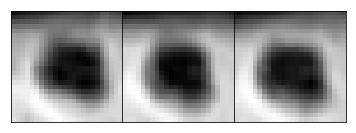

In [156]:
hf.plot_section_auto(x_test_quick[0])#[true_cls][img_num])

['continuous enhancing rim',
 'arterial enhancement',
 'hypointense without enhancement',
 'venous washout',
 'nodular or discontinuous enhancement',
 'regular spherical hypointense mass',
 'hyperintense mass on delayed phase',
 'heterogeneous',
 'infiltrative',
 'central scar',
 'progressive centripetal filling',
 'thin well-defined walls',
 'delayed isointensity',
 'lobulated margins',
 'progressive or concentric enhancement']

In [ ]:
filters_test[true_cls][img_num]

In [106]:
output = {}
for true_cls in C.classes_to_include:
    for img_num in range(len(filters_test[true_cls])):
        z = Z_test[true_cls][img_num]
        x = np.expand_dims(x_test[true_cls][img_num], axis=0)
        evidence = {}
        max_strength = 0
        cls = true_cls
        
        output[z] = [true_cls]
        
        preds = model.predict(x, verbose=False)[0]
        for pred_cls, pred_conf in sorted(zip(C.classes_to_include, preds), key=lambda x:x[1], reverse=True)[:2]:
            output[z] = output[z] + [pred_cls]
        
        for f in all_features:
            evidence[f + "/" + str(cls_features[f])] = get_evidence_strength(feature_filters[f], filters_test[true_cls][img_num])
        
        f1='infiltrative'
        f2='lobulated margins'
        if evidence[f1 + "/" + str(cls_features[f1])] < evidence[f2 + "/" + str(cls_features[f2])]:
            evidence.pop(f1 + "/" + str(cls_features[f1]))
        else:
            evidence.pop(f2 + "/" + str(cls_features[f2]))
        
        for f,strength in sorted(evidence.items(), key=lambda x:x[1], reverse=True):
            output[z] = output[z] + [f, int(strength*100)]

In [107]:
with open('E:\\filters_pred4.csv', 'w', newline='') as csvfile:
    header = ['img_fn', 'agreement1', 'agreement2', 'true_cls', 'pred_cls1', 'pred_cls2'] + \
            [s for i in range(len(all_features)) for s in ['feature_%d' % i,'strength_%d' % i]]
    writer = csv.writer(csvfile)
    writer.writerow(header)
    for z_num in range(len(Z_test_features)):
        writer.writerow([Z_test_features[z_num]] + [output[Z_test_features[z_num]][0] in output[Z_test_features[z_num]][5], \
                        output[Z_test_features[z_num]][0] in output[Z_test_features[z_num]][7]] + output[Z_test_features[z_num]])